In [103]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Sales_LinReg.csv')
data

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6
...,...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9


In [61]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [60]:
data['Republic']=data['Republic'].fillna(data['Republic'].mean())
data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())
data['TV9']=data['TV9'].fillna(data['TV9'].mean())
data['AajTak']=data['AajTak'].fillna(data['AajTak'].mean())
data

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6
...,...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9


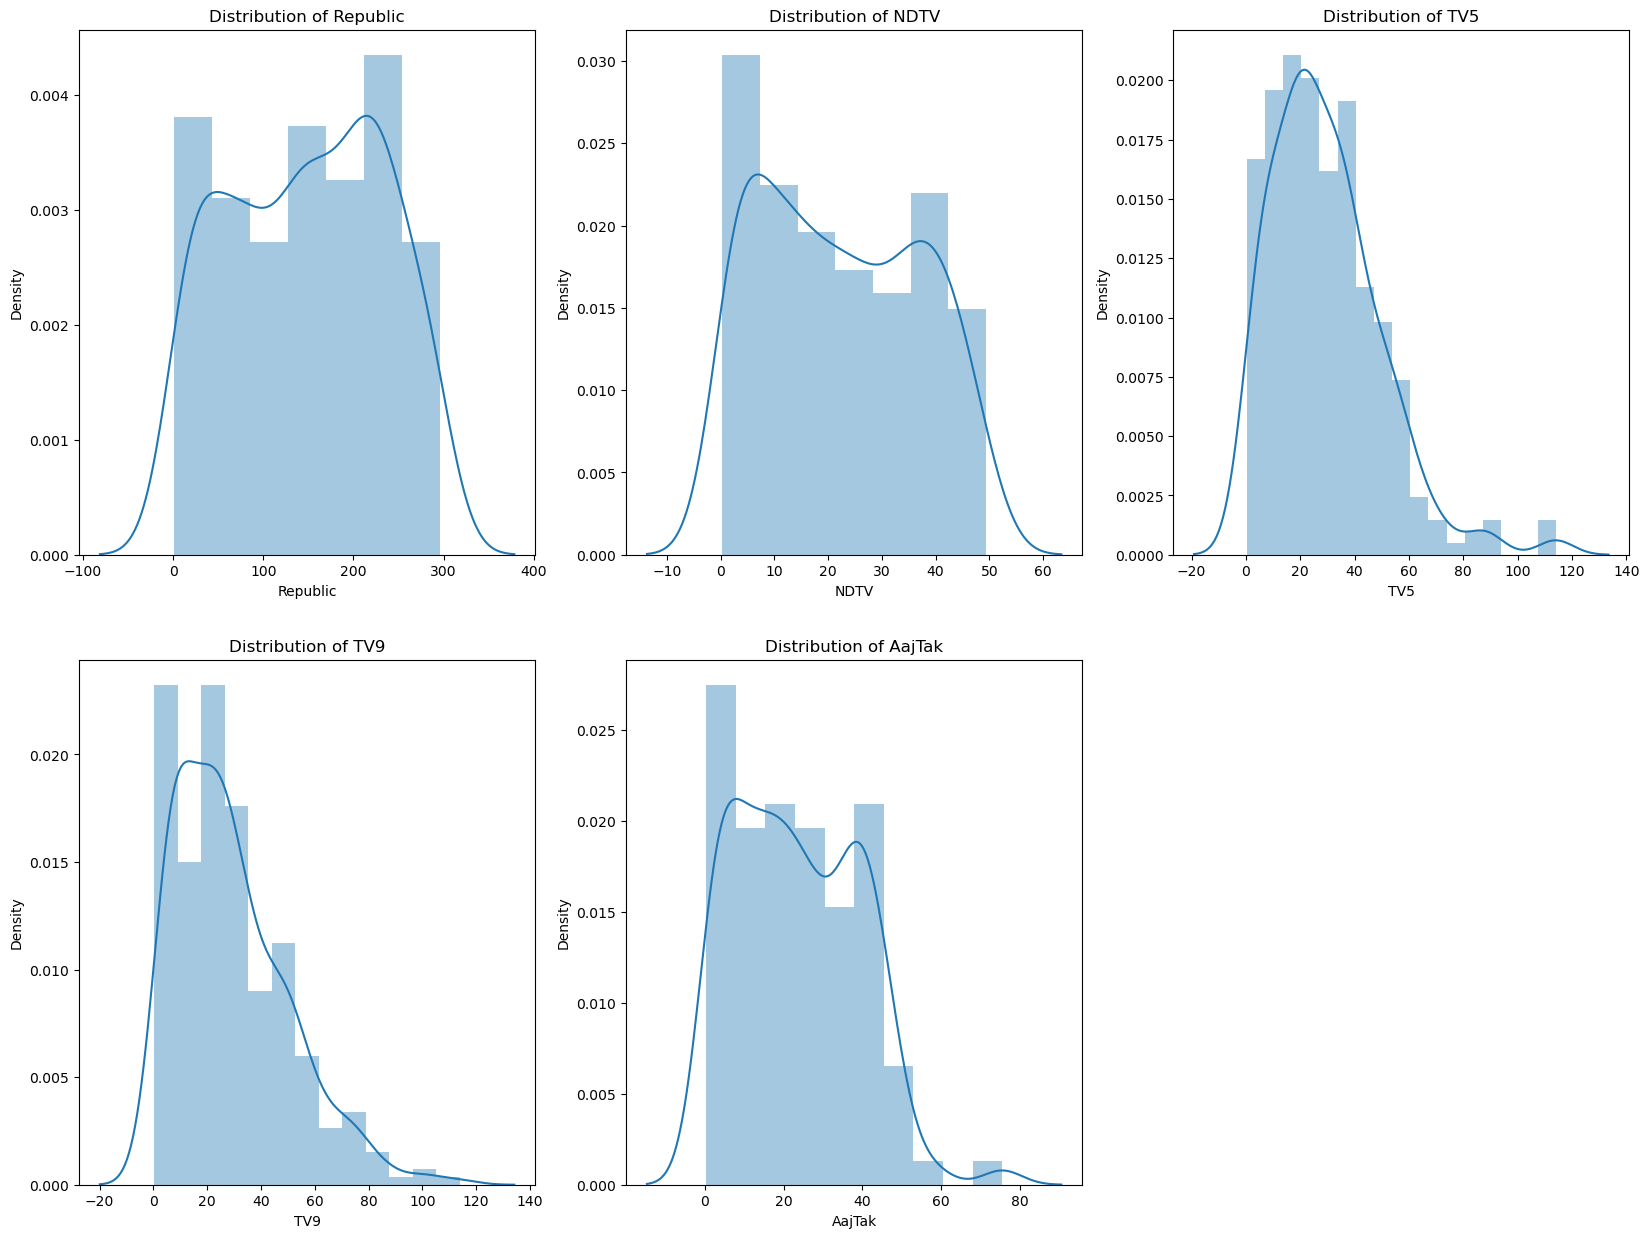

In [21]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 5:
        ax = plt.subplot(2, 3, plotnumber)
        sns.distplot(data[column])
        ax.set_title(f'Distribution of {column}')
    plotnumber += 1
plt.show()

In [79]:
y=data['sales']
x=data.drop(columns=['sales'])

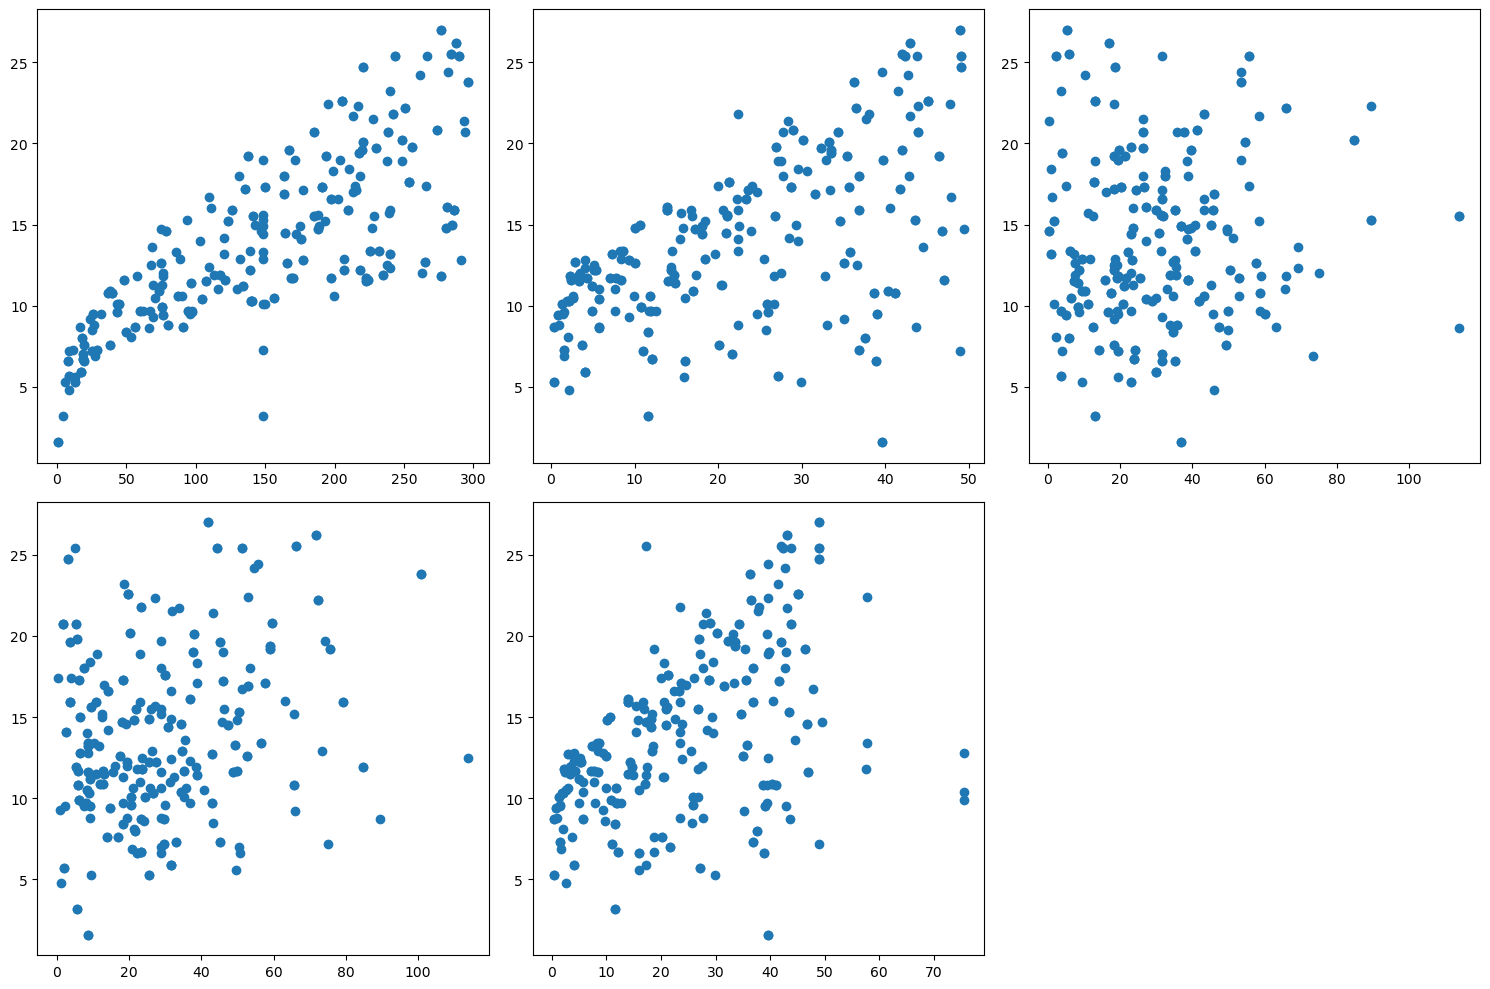

In [113]:
plt.figure(figsize=(15,10))
plotnumber = 1
for column in x:
    if plotnumber<=5 :
        ax = plt.subplot (2,3,plotnumber) 
        plt.scatter(x[column],y)
    plotnumber+=1 
plt.tight_layout()

In [90]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=348)

In [95]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [96]:
regression.score(x_test,y_test)

0.8156325905800008

In [97]:
x_test[1]

array([ 3.31483710e-16, -8.48148073e-02,  9.08663634e-02, -9.17968382e-01,
       -1.54039305e-01])

In [100]:
y_pre=regression.predict(x_test)

TypeError: 'DataFrame' object is not callable

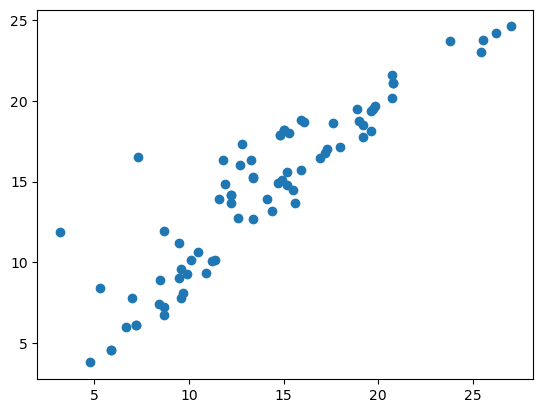

In [101]:
plt.scatter(y_test,y_pre)
plt.xlabel('sales')
plt.ylabel('predicted')
plt.show()

In [104]:
y_pre=regression.predict(x_test)

In [105]:
mean_absolute_error(y_test,y_pre)

1.5963029326621907

In [106]:
mean_squared_error(y_test,y_pre)

5.185447045339978

In [107]:
np.sqrt(mean_squared_error(y_test,y_pre))

2.2771576680897567